In [2781]:

import pandas as pd
import seaborn as sns
import numpy as np
import math
from matplotlib import pyplot as plt
import csv
from scipy.stats import norm, binom 
from scipy import linalg
import random

In [2755]:
## Base parameters
LC = 1 ## Lobby Cost
T = 10 ## Tax
mF = 50 ## Mean Fee of Getting Caught
nPPL = 9
R = nPPL * .6 # enforcement resources

In [2756]:
LobH = [4] ## Lobby History, arbitrary preset
CatH = [1] ## Catch history, arbitrary preset

In [2757]:
def pSS1(t = len(LobH) - 1): #Gets probability of lobbying successfully, subjective
    return 1 - ((.25+CatH[t]) / (1+LobH[t]))

In [2758]:
def pSS(nL, nC): #Gets probability of lobbying successfully, subjective
    return 1 - ((.25+nC) / (1+nL))

In [2759]:
def pCat(t = len(LobH) - 1):  #Gets objective probability of success 
    if LobH[t] <= R:
        return .8
    else:
        return .8 * (R / LobH[t])

In [2760]:
def pCat2(nL):  #Gets objective probability of success 
    if nL <= R:
        return .8
    else:
        return .8 * (R / nL)

In [2761]:
def pL(): ## Calculates subjective probability of lobbying
    ps = pSS()
    temp = (-LC + (ps*T))/((1-ps)*mF) ## value that the normal distrobution draw need to be less then to choose to lobby
    return norm(loc = 1, scale = 1).cdf(temp) ## probability of lobbying for individual

In [2762]:
def pL(nL, nC): ## Calculates subjective probability of lobbying
    ps = pSS(nL, nC)
    temp = (-LC + (ps*T))/((1-ps)*mF) ## value that the normal distrobution draw need to be less then to choose to lobby
    return norm(loc = 1, scale = 1).cdf(temp) ## probability of lobbying for individual

In [2763]:
lis = []
for i in range(0,nPPL+1):
    for r in range(0,nPPL+1):
        lis.append(i)
        
TM = pd.DataFrame({'L': lis }) #Transition Matrix

c = []
for i in range(0,nPPL+1):
    for r in range(0,nPPL+1):
        c.append(r)

TM["C"] = c
TM = TM.drop(TM[TM.C > TM.L].index) ## drop rows where C > L

for i in range(nPPL+1): ## Clear Matrix
    for r in range(0,i+1):
        TM[f"{i},{r}"] = 0

TM = TM.reset_index(drop = True)
TM.head(10)


,L,C,"0,0","1,0","1,1","2,0","2,1","2,2","3,0","3,1",...,"9,0","9,1","9,2","9,3","9,4","9,5","9,6","9,7","9,8","9,9"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,3,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2764]:
#int(TM.columns[3][0])
#TM.loc[4]
pl = pL(nL = TM.L[2], nC = TM.C[1])
pl

fgh = pd.DataFrame({"G": [.5,.5]})
fgh
g = []

#TM.iloc[4] = 2
#M

In [2765]:
for l2 in range(2,len(TM)+2):
    tempList = []
    for l1 in range(0,len(TM)):
        pl2 = pL(TM.L[l1], TM.C[l1])  #grabs the probability of lobbying based on t-5 lobbying
        pnLob = binom.pmf(int(TM.columns[l2][0]), nPPL, pl2) ## binomial distrobution, gets probability they lobied that many times
        pcat = pCat2(int(TM.columns[l2][0]))
        tempList.append(binom.pmf(int(TM.columns[l2][2]), int(TM.columns[l2][0]), pcat) * pnLob)### This need to be fixed for double digits
    TM[TM.columns[l2]] = tempList

TM

,L,C,"0,0","1,0","1,1","2,0","2,1","2,2","3,0","3,1",...,"9,0","9,1","9,2","9,3","9,4","9,5","9,6","9,7","9,8","9,9"
0,0,0,3.293910e-02,2.734254e-02,1.093702e-01,1.008750e-02,8.069996e-02,1.613999e-01,2.170924e-03,2.605109e-02,...,8.638387e-08,7.176506e-07,2.649787e-06,5.707233e-06,7.902323e-06,7.294452e-06,4.488894e-06,1.775826e-06,4.098060e-07,4.203139e-08
1,1,0,2.942311e-04,7.775448e-04,3.110179e-03,9.132291e-04,7.305833e-03,1.461167e-02,6.256780e-04,7.508136e-03,...,2.591778e-05,2.153170e-04,7.950165e-04,1.712343e-03,2.370937e-03,2.188557e-03,1.346804e-03,5.328017e-04,1.229542e-04,1.261069e-05
2,1,1,1.659996e-01,6.598349e-02,2.639340e-01,1.165685e-02,9.325477e-02,1.865095e-01,1.201278e-03,1.441534e-02,...,5.762875e-10,4.787620e-09,1.767736e-08,3.807432e-08,5.271829e-08,4.866304e-08,2.994649e-08,1.184696e-08,2.733914e-09,2.804015e-10
3,2,0,1.096578e-07,9.738426e-07,3.895371e-06,3.843754e-06,3.075003e-05,6.150006e-05,8.849915e-06,1.061990e-04,...,5.280324e-04,4.386731e-03,1.619716e-02,3.488619e-02,4.830396e-02,4.458827e-02,2.743893e-02,1.085496e-02,2.504992e-03,2.569222e-04
4,2,1,1.053452e-01,5.387115e-02,2.154846e-01,1.224377e-02,9.795020e-02,1.959004e-01,1.623272e-03,1.947926e-02,...,3.530745e-09,2.933235e-08,1.083040e-07,2.332703e-07,3.229896e-07,2.981442e-07,1.834734e-07,7.258287e-08,1.674989e-08,1.717938e-09
5,2,2,1.899462e-01,6.929888e-02,2.771955e-01,1.123672e-02,8.989374e-02,1.797875e-01,1.062844e-03,1.275413e-02,...,3.048383e-10,2.532503e-09,9.350781e-09,2.014014e-08,2.788635e-08,2.574125e-08,1.584077e-08,6.266678e-09,1.446156e-09,1.483237e-10
6,3,0,1.012237e-12,3.737933e-11,1.495173e-10,6.134771e-10,4.907817e-09,9.815634e-09,5.873297e-09,7.047957e-08,...,1.811356e-03,1.504819e-02,5.556255e-02,1.196732e-01,1.657013e-01,1.529551e-01,9.412620e-02,3.723674e-02,8.593093e-03,8.813429e-04
7,3,1,6.160177e-02,4.024844e-02,1.609937e-01,1.168752e-02,9.350014e-02,1.870003e-01,1.979759e-03,2.375711e-02,...,1.873152e-08,1.556157e-07,5.745811e-07,1.237559e-06,1.713544e-06,1.581733e-06,9.733739e-07,3.850710e-07,8.886253e-08,9.114106e-09
8,3,2,1.510485e-01,6.353985e-02,2.541594e-01,1.187937e-02,9.503496e-02,1.900699e-01,1.295560e-03,1.554672e-02,...,8.730956e-10,7.253410e-09,2.678182e-08,5.768392e-08,7.987004e-08,7.372619e-08,4.536997e-08,1.794856e-08,4.141975e-09,4.248179e-10
9,3,3,1.996256e-01,7.045025e-02,2.818010e-01,1.105010e-02,8.840082e-02,1.768016e-01,1.011037e-03,1.213244e-02,...,2.375693e-10,1.973653e-09,7.287334e-09,1.569580e-08,2.173264e-08,2.006090e-08,1.234517e-08,4.883803e-09,1.127031e-09,1.155930e-10


for l1 in range(0,len(TM)):
    pl2 = pL(TM.L[l1], TM.C[l1])  #grabs the probability of lobbying based on t-5 lobbying
    for l2 in range(2,len(TM)+2):
        pnLob = binom.pmf(int(TM.columns[l2][0]), nPPL, pl2) ## binomial distrobution, gets probability they lobied that many times
        pcat = pCat2(int(TM.columns[l2][0]))
        TM.loc[l1][l2] = 1#int(binom.pmf(int(TM.columns[l2][2]), int(TM.columns[l2][0]), pcat) * pnLob * 10000000000000000000)### This need to be fixed for double digits

TM

for l2 in range(2,len(TM)+2):
    tempList = []
    for l1 in range(0,len(TM)):
        pl2 = pL(TM.L[l1], TM.C[l1])  #grabs the probability of lobbying based on t-5 lobbying
        pnLob = binom.pmf(int(TM.columns[l2][0]), nPPL, pl2) ## binomial distrobution, gets probability they lobied that many times
        pcat = pCat2(int(TM.columns[l2][0]))
    TM.loc[l1][l2] = binom.pmf(int(TM.columns[l2][2]), int(TM.columns[l2][0]), pcat) * pnLob### This need to be fixed for double digits

TM

for l1 in range(0,len(TM)):
    pl2 = pL(TM.L[l1], TM.C[l1])  #grabs the probability of lobbying based on t-5 lobbying
    for l2 in range(2,len(TM)+2):
        pnLob = binom.pmf(int(TM.columns[l2][0]), nPPL, pl2) ## binomial distrobution, gets probability they lobied that many times
        pcat = pCat2(int(TM.columns[l2][0]))
    TM.loc[l1][l2] = 1.5#int(binom.pmf(int(TM.columns[l2][2]), int(TM.columns[l2][0]), pcat) * pnLob * 10000000000000000000)### This need to be fixed for double digits

TM

In [2766]:
#TM['s'] = TM.sum(axis = 1)

In [2767]:
pL(2,1)

0.22124359244720182

In [2768]:
#TML = pd.DataFrame({'L': range(0,nPPL+1)}) #Transition Matrix
#for i in range(nPPL+1): ## Clear Matrix
#    TML[i] = 0

#for l1 in range(0,nPPL+1): # row
#    for l2 in range(0,nPPL+1): ## column
#        TML[l2][l1] = TM.loc[TM['L'] == l1, l2].sum() / (l1+1)
#TML




In [2769]:
#TM['s'] = TM.sum(axis = 1)
#TM
#Rows sum to 1


In [2770]:
tempTM = TM.iloc[0:len(TM),2:len(TM)+2]
tempTM

,"0,0","1,0","1,1","2,0","2,1","2,2","3,0","3,1","3,2","3,3",...,"9,0","9,1","9,2","9,3","9,4","9,5","9,6","9,7","9,8","9,9"
0,3.293910e-02,2.734254e-02,1.093702e-01,1.008750e-02,8.069996e-02,1.613999e-01,2.170924e-03,2.605109e-02,1.042044e-01,1.389391e-01,...,8.638387e-08,7.176506e-07,2.649787e-06,5.707233e-06,7.902323e-06,7.294452e-06,4.488894e-06,1.775826e-06,4.098060e-07,4.203139e-08
1,2.942311e-04,7.775448e-04,3.110179e-03,9.132291e-04,7.305833e-03,1.461167e-02,6.256780e-04,7.508136e-03,3.003254e-02,4.004339e-02,...,2.591778e-05,2.153170e-04,7.950165e-04,1.712343e-03,2.370937e-03,2.188557e-03,1.346804e-03,5.328017e-04,1.229542e-04,1.261069e-05
2,1.659996e-01,6.598349e-02,2.639340e-01,1.165685e-02,9.325477e-02,1.865095e-01,1.201278e-03,1.441534e-02,5.766136e-02,7.688181e-02,...,5.762875e-10,4.787620e-09,1.767736e-08,3.807432e-08,5.271829e-08,4.866304e-08,2.994649e-08,1.184696e-08,2.733914e-09,2.804015e-10
3,1.096578e-07,9.738426e-07,3.895371e-06,3.843754e-06,3.075003e-05,6.150006e-05,8.849915e-06,1.061990e-04,4.247959e-04,5.663946e-04,...,5.280324e-04,4.386731e-03,1.619716e-02,3.488619e-02,4.830396e-02,4.458827e-02,2.743893e-02,1.085496e-02,2.504992e-03,2.569222e-04
4,1.053452e-01,5.387115e-02,2.154846e-01,1.224377e-02,9.795020e-02,1.959004e-01,1.623272e-03,1.947926e-02,7.791703e-02,1.038894e-01,...,3.530745e-09,2.933235e-08,1.083040e-07,2.332703e-07,3.229896e-07,2.981442e-07,1.834734e-07,7.258287e-08,1.674989e-08,1.717938e-09
5,1.899462e-01,6.929888e-02,2.771955e-01,1.123672e-02,8.989374e-02,1.797875e-01,1.062844e-03,1.275413e-02,5.101650e-02,6.802200e-02,...,3.048383e-10,2.532503e-09,9.350781e-09,2.014014e-08,2.788635e-08,2.574125e-08,1.584077e-08,6.266678e-09,1.446156e-09,1.483237e-10
6,1.012237e-12,3.737933e-11,1.495173e-10,6.134771e-10,4.907817e-09,9.815634e-09,5.873297e-09,7.047957e-08,2.819183e-07,3.758910e-07,...,1.811356e-03,1.504819e-02,5.556255e-02,1.196732e-01,1.657013e-01,1.529551e-01,9.412620e-02,3.723674e-02,8.593093e-03,8.813429e-04
7,6.160177e-02,4.024844e-02,1.609937e-01,1.168752e-02,9.350014e-02,1.870003e-01,1.979759e-03,2.375711e-02,9.502844e-02,1.267046e-01,...,1.873152e-08,1.556157e-07,5.745811e-07,1.237559e-06,1.713544e-06,1.581733e-06,9.733739e-07,3.850710e-07,8.886253e-08,9.114106e-09
8,1.510485e-01,6.353985e-02,2.541594e-01,1.187937e-02,9.503496e-02,1.900699e-01,1.295560e-03,1.554672e-02,6.218687e-02,8.291582e-02,...,8.730956e-10,7.253410e-09,2.678182e-08,5.768392e-08,7.987004e-08,7.372619e-08,4.536997e-08,1.794856e-08,4.141975e-09,4.248179e-10
9,1.996256e-01,7.045025e-02,2.818010e-01,1.105010e-02,8.840082e-02,1.768016e-01,1.011037e-03,1.213244e-02,4.852976e-02,6.470634e-02,...,2.375693e-10,1.973653e-09,7.287334e-09,1.569580e-08,2.173264e-08,2.006090e-08,1.234517e-08,4.883803e-09,1.127031e-09,1.155930e-10


In [2771]:
mat = tempTM.to_numpy()
print(np.matrix(mat))

[[3.29391043e-02 2.73425379e-02 1.09370152e-01 ... 1.77582606e-06
  4.09806015e-07 4.20313861e-08]
 [2.94231073e-04 7.77544765e-04 3.11017906e-03 ... 5.32801742e-04
  1.22954248e-04 1.26106921e-05]
 [1.65999573e-01 6.59834883e-02 2.63933953e-01 ... 1.18469616e-08
  2.73391422e-09 2.80401459e-10]
 ...
 [1.85690344e-01 6.87596178e-02 2.75038471e-01 ... 7.00215678e-09
  1.61588233e-09 1.65731521e-10]
 [2.01412674e-01 7.06517425e-02 2.82606970e-01 ... 4.66612999e-09
  1.07679923e-09 1.10440947e-10]
 [2.14200822e-01 7.19972502e-02 2.87989001e-01 ... 3.37924296e-09
  7.79825298e-10 7.99820818e-11]]


In [2807]:
st = mat
for i in range(0,10):
    st = np.matmul(st,st)
    
st[0]

array([1.36092770e-01, 5.54832824e-02, 2.21933130e-01, 1.06085957e-02,
       8.48687656e-02, 1.69737531e-01, 1.30240524e-03, 1.56288629e-02,
       6.25154517e-02, 8.33539356e-02, 1.24384926e-04, 1.99015882e-03,
       1.19409529e-02, 3.18425412e-02, 3.18425412e-02, 1.17128856e-05,
       2.34257711e-04, 1.87406169e-03, 7.49624675e-03, 1.49924935e-02,
       1.19939948e-02, 9.91881268e-06, 1.53033110e-04, 9.83784278e-04,
       3.37297467e-03, 6.50502257e-03, 6.69088036e-03, 2.86752015e-03,
       1.52503081e-05, 1.72078104e-04, 8.32138890e-04, 2.23559702e-03,
       3.60364892e-03, 3.48532015e-03, 1.87270934e-03, 4.31242235e-04,
       1.47081301e-05, 1.38128526e-04, 5.67528075e-04, 1.33245722e-03,
       1.95523614e-03, 1.83622176e-03, 1.07778234e-03, 3.61492213e-04,
       5.30450531e-05, 9.90815475e-06, 8.23139010e-05, 3.03928250e-04,
       6.54614692e-04, 9.06389574e-04, 8.36667299e-04, 5.14872184e-04,
       2.03685699e-04, 4.70043921e-05, 4.82096329e-06])

In [2783]:
linalg.eig(mat, left = True)[0]

array([ 1.00000000e+00+0.00000000e+00j, -1.90912133e-01+0.00000000e+00j,
       -4.46359951e-02+0.00000000e+00j,  1.56428246e-02+6.94591395e-03j,
        1.56428246e-02-6.94591395e-03j, -1.70044765e-04+1.05678622e-03j,
       -1.70044765e-04-1.05678622e-03j,  6.94086280e-05+1.29845921e-06j,
        6.94086280e-05-1.29845921e-06j, -6.28846096e-06+0.00000000e+00j,
       -2.30594863e-17+3.21466594e-16j, -2.30594863e-17-3.21466594e-16j,
        7.30635002e-17+0.00000000e+00j, -7.38214522e-17+0.00000000e+00j,
        2.63245113e-17+1.06926874e-17j,  2.63245113e-17-1.06926874e-17j,
       -1.24787925e-17+2.23222837e-17j, -1.24787925e-17-2.23222837e-17j,
       -2.12339389e-17+0.00000000e+00j, -5.36570443e-18+7.24469312e-18j,
       -5.36570443e-18-7.24469312e-18j, -6.50802800e-18+0.00000000e+00j,
       -9.07331688e-19+5.19013313e-18j, -9.07331688e-19-5.19013313e-18j,
        4.75302923e-18+6.75490000e-19j,  4.75302923e-18-6.75490000e-19j,
        2.84717738e-18+2.46002234e-18j,  2.84717738

Dynamic Part

In [2774]:
def it():
    t = len(LobH)
    LobH.append(0)
    CatH.append(0)
    ps = pSS1()
    for i in range(0,nPPL+1):
        if -T < (ps * -LC) + ((1-ps) * (-T - LC - (mF * np.random.normal(loc = 1, scale = .5)))):
            LobH[t] = LobH[t] + 1
            
    for i in range(0,LobH[t]):
        if random.random() < pCat():
            CatH[t] = CatH[t] + 1

In [2775]:
for i in range(0,10000):
    it()


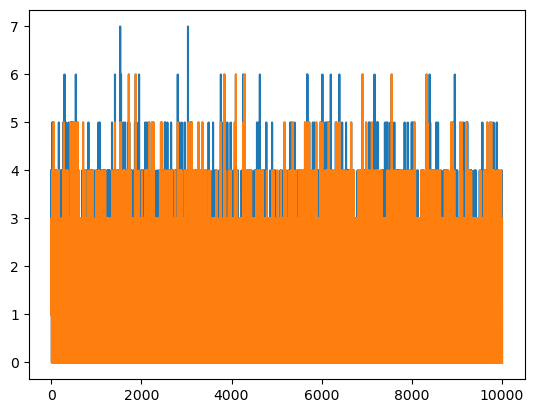

In [2776]:
plt.plot(LobH)
plt.plot(CatH)

(array([1.577e+03, 3.264e+03, 2.932e+03, 0.000e+00, 1.544e+03, 5.270e+02,
        0.000e+00, 1.300e+02, 2.500e+01, 2.000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

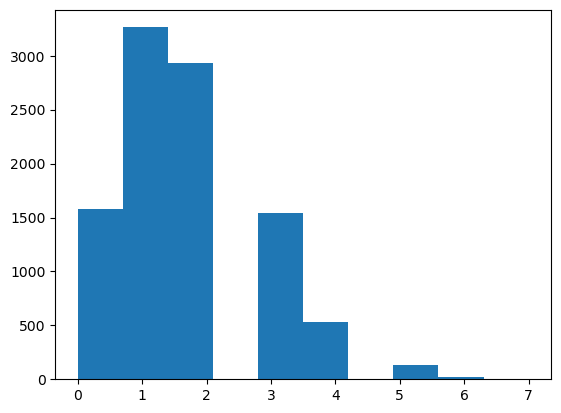

In [2777]:
plt.hist(LobH)

(array([2393., 3654.,    0., 2568.,    0., 1032.,  293.,    0.,   53.,
           8.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

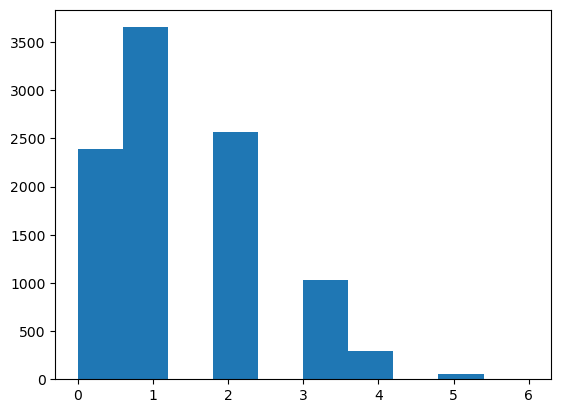

In [2778]:
plt.hist(CatH)

In [2779]:
print(LobH)

[4, 1, 1, 3, 1, 1, 1, 4, 2, 1, 3, 1, 2, 2, 3, 3, 0, 0, 1, 1, 2, 2, 2, 2, 3, 1, 2, 1, 2, 0, 5, 1, 3, 3, 0, 0, 2, 3, 1, 5, 2, 2, 1, 0, 1, 2, 0, 1, 1, 4, 0, 0, 0, 1, 2, 3, 5, 2, 2, 3, 1, 3, 1, 1, 1, 0, 1, 2, 0, 1, 2, 4, 2, 2, 1, 1, 0, 1, 2, 1, 2, 3, 1, 2, 3, 1, 1, 2, 3, 2, 1, 4, 2, 1, 1, 2, 2, 2, 1, 4, 2, 1, 2, 2, 1, 3, 4, 2, 1, 1, 0, 2, 4, 3, 4, 2, 2, 1, 3, 0, 1, 3, 3, 1, 1, 2, 2, 3, 1, 0, 3, 1, 1, 2, 3, 0, 2, 1, 2, 2, 2, 3, 1, 3, 3, 3, 2, 0, 1, 2, 3, 1, 3, 0, 2, 1, 2, 0, 2, 1, 0, 2, 1, 0, 3, 1, 2, 3, 3, 1, 3, 5, 3, 4, 3, 0, 0, 2, 4, 2, 3, 1, 1, 1, 2, 2, 0, 1, 3, 3, 3, 1, 1, 2, 1, 3, 3, 2, 1, 2, 1, 1, 1, 1, 0, 2, 2, 2, 3, 0, 1, 4, 1, 4, 2, 1, 2, 2, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 4, 3, 4, 2, 2, 1, 4, 3, 1, 2, 1, 1, 1, 1, 2, 0, 2, 0, 3, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 2, 2, 1, 1, 0, 3, 5, 1, 3, 1, 1, 4, 2, 2, 0, 0, 3, 2, 2, 2, 3, 2, 1, 5, 1, 3, 3, 1, 3, 1, 2, 2, 1, 1, 4, 2, 1, 1, 6, 3, 2, 1, 1, 3, 2, 4, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 3, 0, 5, 2, 2, 4, 1, 3, 2, 1, 1, 4, 1, 1, 1, 1, 3, 2, 5, 